# Week 7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Great content about what to be careful about in linear regression modeling
# https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

## Day 1: Nonlinear Regression and Model Assessment
Today we take a closer look at cases when the linear model does not apply. Further, we talk about how to assess the model using machine learning approach to the process.

### Example 1: fake linear relationship
A substance is slowly dissolving in acid. The data in `acid_solution.csv` contains measurements of the time (in minutes) after the start of the process, and percent of the substance that has dissolved by that time.
Is there evidence that there is a linear relationship between time passed and the percent of dissolved substance?

,time,percent_dissolved
0,1.0,0.68
1,1.1,1.14
2,1.2,1.72
3,1.3,1.59
4,1.4,1.75


<AxesSubplot:xlabel='time', ylabel='percent_dissolved'>

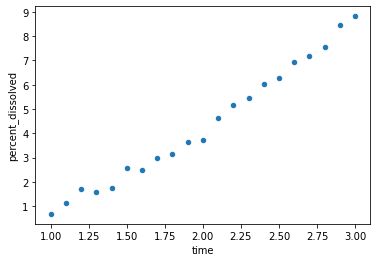

In [2]:
# Load data
df = pd.read_csv('acid_solution.csv')
display(df.head())

df.plot(x='time', y='percent_dissolved', kind='scatter')

In [3]:
# Build the model
X = np.array(df['time']).reshape(-1, 1)
y = np.array(df['percent_dissolved'])

model = LinearRegression().fit(X, y)

slope = np.round(model.coef_[0], 2)
intercept = np.round(model.intercept_, 2)
print(f'The model is: % dissolved = {intercept} + {slope}*time')

The model is: % dissolved = -3.66 + 4.02*time


r-sq =  0.9846171141722794
r =  0.9922787482216272


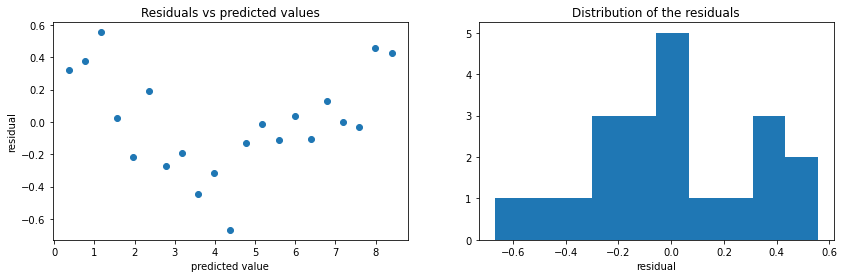

The residual plot shows a strong pattern, so the model is not appropriate!


In [4]:
# Establishing if the model is good
# Use r^2 and residuals
r_sq = model.score(X, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

y_pred = model.predict(X)
resid = y - y_pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('The residual plot shows a strong pattern, so the model is not appropriate!')

r-sq =  0.9943993963886015
r =  0.9971957663310658


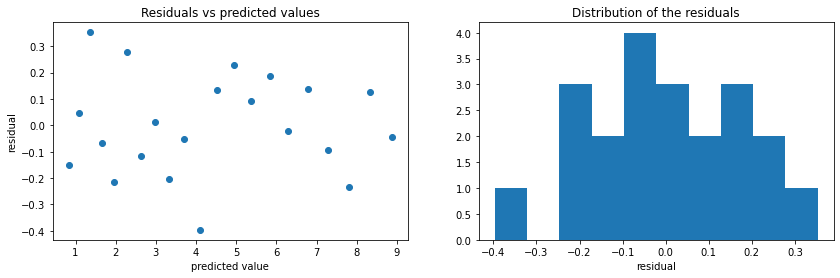

In [15]:
# Fittina a nonlinear model
from sklearn.preprocessing import PolynomialFeatures

# Instance the transformer, transform the data
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(X)
X_trans = poly_transformer.transform(X)

# Build the model
quad_model = LinearRegression().fit(X_trans, y)
y_trans_pred = quad_model.predict(X_trans)
resid_trans = y - y_trans_pred

r_sq = quad_model.score(X_trans, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_trans_pred, resid_trans)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid_trans)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()


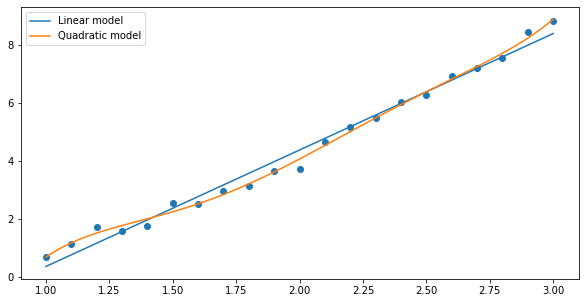

In [14]:
# Plot the two models
xs = np.linspace(X.min(), X.max(), 1000)
y_lin = model.predict(xs.reshape(-1, 1))
y_quad = quad_model.predict(poly_transformer.transform(xs.reshape(-1, 1)))

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(xs, y_lin, label='Linear model')
plt.plot(xs, y_quad, label='Quadratic model')
plt.legend()
plt.show()

### Assessing the model using `statsmodels`

Next we take a look at the modeling we can do with `statsmodels`'s OLS (ordinary least squares) function, and the summary output it offers.

In [9]:
# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1216.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.09e-18
Time:                        10:04:38   Log-Likelihood:                -4.7976
No. Observations:                  21   AIC:                             13.60
Df Residuals:                      19   BIC:                             15.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6565      0.241    -15.189      0.000      -4.160      -3.153
x1             4.0175      0.115     34.873      0.000       3.776       4.259
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.167
Skew:                          -0.041   Prob(JB):                        0.920
Kurtosis:                       2.571   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

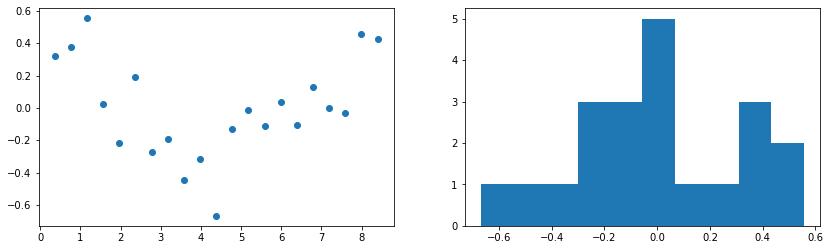

In [10]:
# Plot the residuals
y_pred = results.predict(X_sm)
resid = y - y_pred

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, resid)

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.show()

In [11]:
# Build the model
quad_model = sm.OLS(y, X_trans)
quad_results = quad_model.fit()

quad_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1598.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           5.42e-21
Time:                        10:05:27   Log-Likelihood:                 5.8114
No. Observations:                  21   AIC:                            -5.623
Df Residuals:                      18   BIC:                            -2.489
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9609      0.503     -1.909      0.072      -2.018       0.097
x1             1.0499      0.534      1.966      0.065      -0.072       2.172
x2             0.7419      0.132      5.607      0.000       0.464       1.020
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.260
Skew:                          -0.063   Prob(JB):                        0.878
Kurtosis:                       2.469   Cond. No.                         94.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparing models: an ML approach
In ML the approach to testing the model performance is generally independent of the statistical measures. The following approach is frequently taken:
* Split the original data into two sets: a train set and a test set. The test set is 20%-30% of the size of the original data set
* Build/Train the model on the train set only
* Test the model on the test set only. Frequent *metrics* for this include:
    * **Mean Absolute Error (MAE)** $\displaystyle \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left|\, \text{obs} - \text{pred} \,\right|$
    * **Mean Squared Error (MSE)** $\displaystyle \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2$
    * **Root Mean Squared Error (RMSE)** $\displaystyle \text{MAE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \text{obs} - \text{pred} \right)^2}$
    
### Example 2
The data given in `final_score.csv` contain information about the scores of a group of students in a statistics course.
* Split the original data into train and test sets. The test set should be 30% of the total data
* Build a linear model for the `final` using all available features
* By considering the `pairplot`, remove the least important feature, and build a second model without that feature
* Compare the performance of the two models using MAE, MSE and RMSE

In [12]:
# Load sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('final_score.csv')
X = np.array(df[['test_1', 'test_2', 'project', 'homework']])
y = np.array(df['final'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Build a linear model
model_full = LinearRegression().fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_full)
mse = mean_squared_error(y_test, y_pred_full)
rmse = np.sqrt(mse)
print('Model with four features:')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)

Model with four features:
MAE =  15.75431935594491
MSE =  427.0497790423944
RMSE =  20.665182773021737


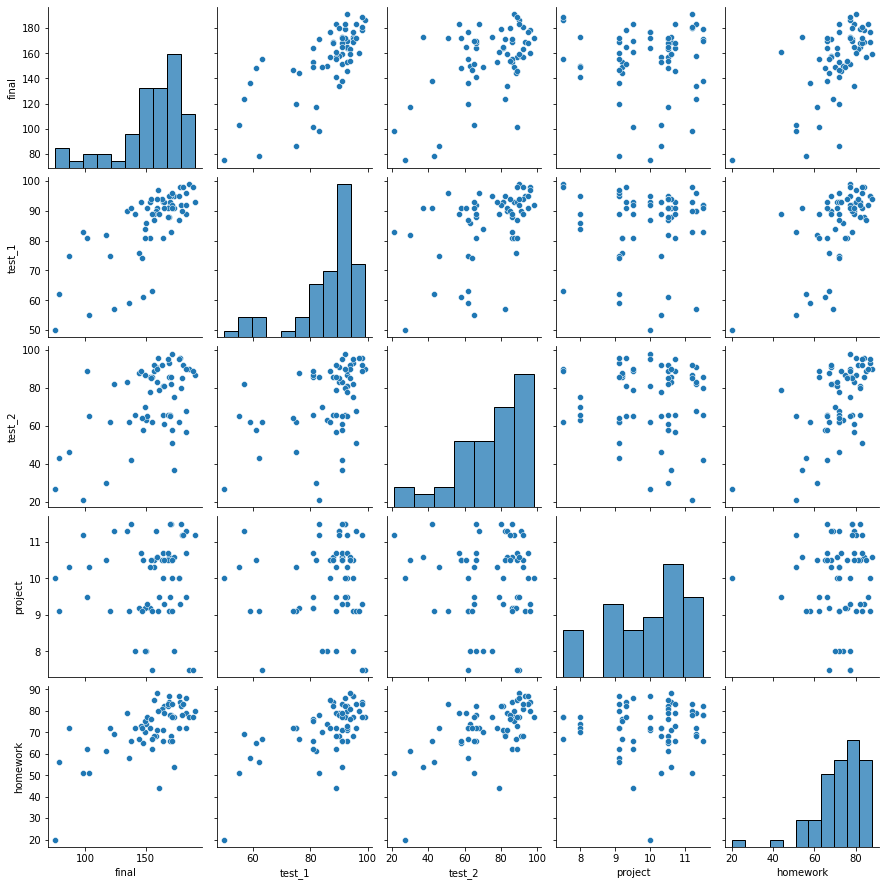

In [13]:
# Identify the least important feature
sns.pairplot(df)

In [12]:
# Build the model with three features
X = np.array(df[['test_1', 'test_2', 'homework']])
y = np.array(df['final'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Build a linear model
model_full = LinearRegression().fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_full)
mse = mean_squared_error(y_test, y_pred_full)
rmse = np.sqrt(mse)
print('Model with four features:')
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)

Model with four features:
MAE =  14.744588433532439
MSE =  375.8031906748798
RMSE =  19.38564393242793
